In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/data.csv')

data.head(3)

,Fecha de Transacción,Referencia de Transacción,Código de Transacción,Descripción de Transacción,Débito de Transacción,Crédito de Transacción,Balance de Transacción
0,01/04/2022,33100000,CP,SUPER GUANTANAMERA MONTE,725.0,0.0,971383.12
1,01/04/2022,958441523,TS,SINPE MOVIL Sin_Descripcion,10000.0,0.0,961383.12
2,01/04/2022,966412860,TF,SINPE MOVIL Sin_Descripcion,10000.0,0.0,951383.12


In [3]:
data['Descripción de Transacción'] = data['Descripción de Transacción'].str.strip()

data['Fecha de Transacción'] = pd.to_datetime(data['Fecha de Transacción'], format='%d/%m/%Y')

In [4]:
def clean_special_characters(text):
    cleaned_text = re.sub(r'[-*,.@]', '', text)
    cleaned_text = re.sub(r'_+$', '', cleaned_text)
    cleaned_text = re.sub(r'_', ' ', cleaned_text)
    return cleaned_text

data['Descripción de Transacción'] = data['Descripción de Transacción'].apply(clean_special_characters)

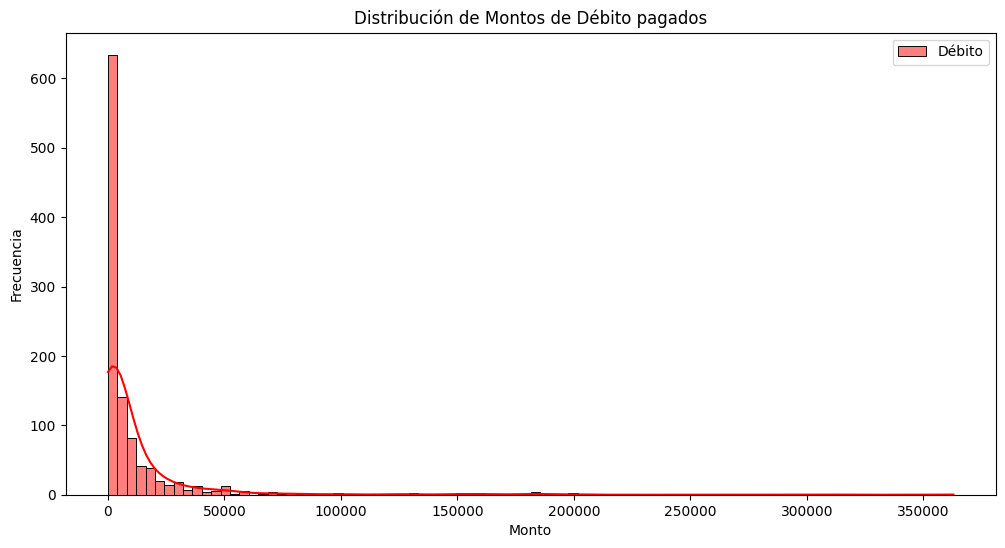

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Débito de Transacción'], kde=True, color='red', bins=90, label='Débito')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Montos de Débito pagados')
plt.legend()
plt.show()

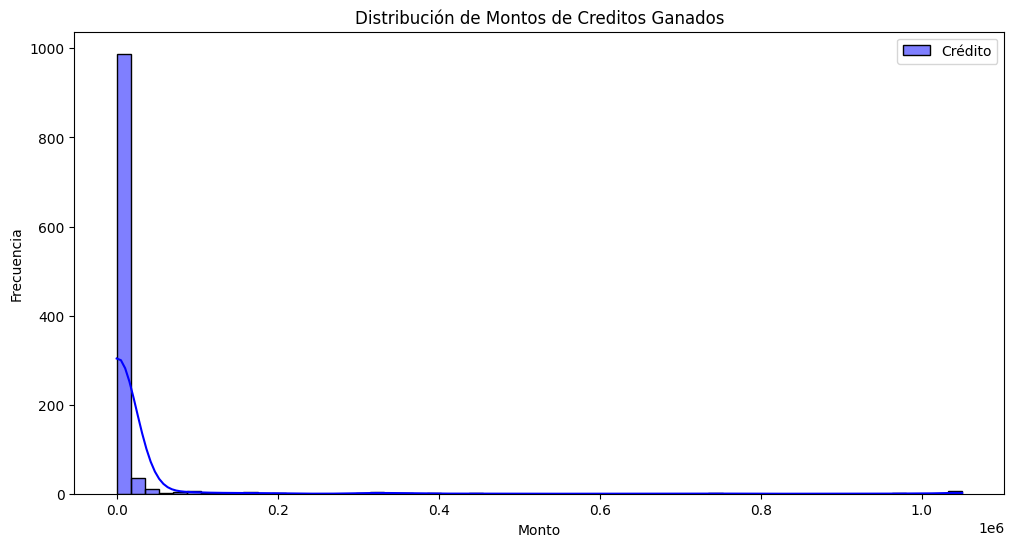

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Crédito de Transacción'], kde=True, color='blue', bins=60, label='Crédito')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Montos de Creditos Ganados')
plt.legend()
plt.show()

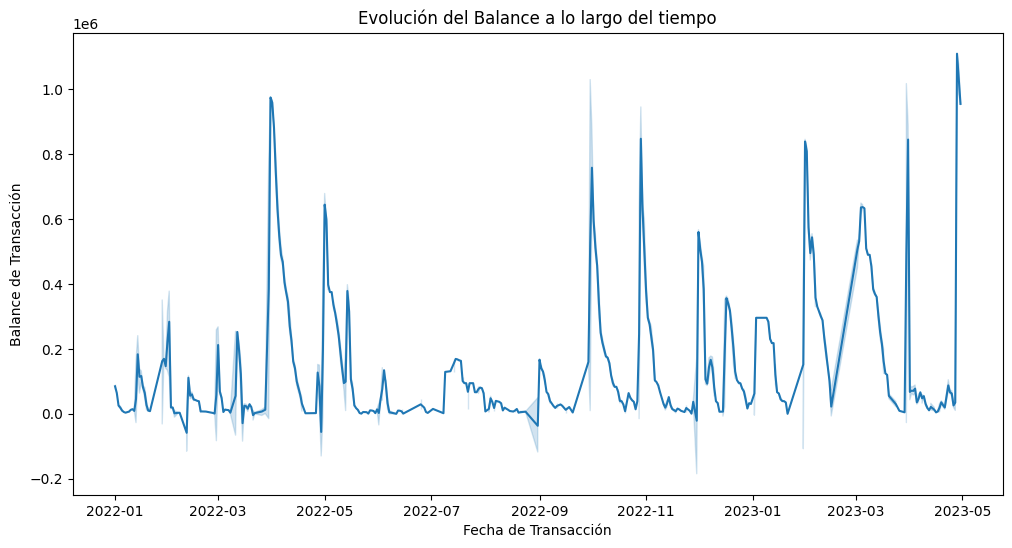

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Fecha de Transacción', y='Balance de Transacción')
plt.xlabel('Fecha de Transacción')
plt.ylabel('Balance de Transacción')
plt.title('Evolución del Balance a lo largo del tiempo')
plt.show()

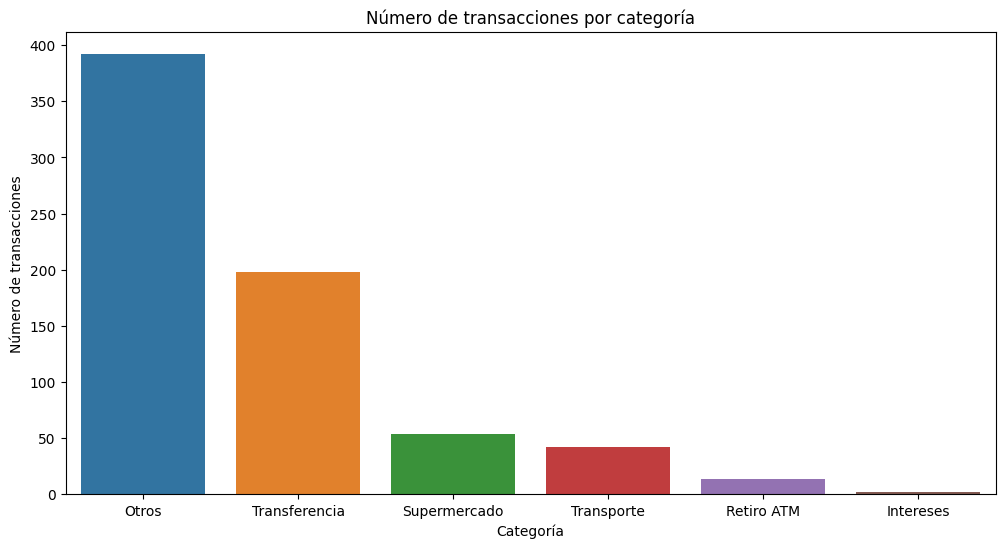

In [8]:
def categorize_description(description):
    categories = {
        'SUPER': 'Supermercado',
        'SINPE': 'Transferencia',
        'UBER': 'Transporte',
        'ATM': 'Retiro ATM',
        'INTERESES': 'Intereses',
    }
    for keyword, category in categories.items():
        if keyword in description:
            return category
    return 'Otros'

data['Categoría'] = data['Descripción de Transacción'].apply(categorize_description)

plt.figure(figsize=(12, 6))
gastos = data[data['Débito de Transacción'] > 0]
sns.barplot(x=gastos['Categoría'].value_counts().index, y=gastos['Categoría'].value_counts().values)
plt.xlabel('Categoría')
plt.ylabel('Número de transacciones')
plt.title('Número de transacciones por categoría')
plt.show()

In [9]:
df = pd.read_csv('./data/training_data.csv')
df.head()

,Fecha de Transacción,Referencia de Transacción,Código de Transacción,Descripción de Transacción,Débito de Transacción,Crédito de Transacción,Balance de Transacción,Categoria
0,3/3/2022,30200000,CP,ABASTECEDOR ECONOMICO CENTR,1900.00,0.0,52394.02,minisuper
1,16/11/2022,111500000,CP,ABASTECEDOR ECONOMICO CENTR,3925.00,0.0,16223.82,minisuper
2,18/12/2022,121700248,CP,AEROPOST,23464.52,0.0,339056.96,compra extranjero
3,5/12/2022,120400000,CP,ALMACENES UNIDOS SAN J,2575.00,0.0,118454.31,ferreteria
4,21/11/2022,112000000,CP,ALMACENES UNIDOS SAN J,3060.00,0.0,9242.82,ferreteria
